In [100]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

import gym
import plotting
from lib.envs import blackjack
matplotlib.style.use('ggplot')

## Create Environment

In [101]:
env=blackjack.BlackjackEnv()

Actions:
Hit: 1
Sticks: 0

In [102]:
env.action_space.sample()

1

In [103]:
env.observation_space.spaces

(Discrete(32), Discrete(11), Discrete(2))

In [104]:
observation=env.reset()
observation

(16, 9, True)

In [105]:
action = 0
observation, reward, done, info = env.step(action)
observation, reward, done, info

((16, 9, True), -1, True, {})

In [106]:
def observation_clean(observation):
    return (observation[0], observation[1], observation[2])

def print_observation(observation):
    player_score, dealer_score, usable_ace = observation
    print("Player Score: {} (Usable Ace: {}), Dealer Score: {}".format(
          player_score, usable_ace, dealer_score))
    
def policy(observation):
    player_score, dealer_score, usable_ace = observation
    
    # Stick (action 0) if the score is > 20, hit (action 1) otherwise
    return 0 if player_score >= 20 else 1

In [107]:
def play_blackjack():
    for episode in range(20):
        observation = env.reset()
        for i in range(100):
            print_observation(observation)
            
            action = policy(observation)
            print("Taking action: {}".format( ["Stick", "Hit"][action]))
            
            observation, reward, done, _ = env.step(action)
            if done:
                print('FINAL SCORE:')
                print_observation(observation)
                print("Game end. Reward: {}\n".format(float(reward)))
                break
                
play_blackjack()

Player Score: 21 (Usable Ace: True), Dealer Score: 7
Taking action: Stick
FINAL SCORE:
Player Score: 21 (Usable Ace: True), Dealer Score: 7
Game end. Reward: 0.0

Player Score: 14 (Usable Ace: False), Dealer Score: 3
Taking action: Hit
Player Score: 15 (Usable Ace: False), Dealer Score: 3
Taking action: Hit
Player Score: 16 (Usable Ace: False), Dealer Score: 3
Taking action: Hit
FINAL SCORE:
Player Score: 26 (Usable Ace: False), Dealer Score: 3
Game end. Reward: -1.0

Player Score: 15 (Usable Ace: False), Dealer Score: 9
Taking action: Hit
FINAL SCORE:
Player Score: 25 (Usable Ace: False), Dealer Score: 9
Game end. Reward: -1.0

Player Score: 18 (Usable Ace: False), Dealer Score: 6
Taking action: Hit
FINAL SCORE:
Player Score: 27 (Usable Ace: False), Dealer Score: 6
Game end. Reward: -1.0

Player Score: 18 (Usable Ace: False), Dealer Score: 8
Taking action: Hit
FINAL SCORE:
Player Score: 26 (Usable Ace: False), Dealer Score: 8
Game end. Reward: -1.0

Player Score: 14 (Usable Ace: False

## Monte Carlo State Value Prediction

In [113]:
def find_state_value_function(policy, env, num_episodes, discount=1.0, debug=False):
    
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    V = defaultdict(float)
    
    for episode in range(1, num_episodes+1):
        
        if debug:
            if episode % 1000 == 0:
                print("\rEpisode {}/{}.".format(episode, num_episodes))

            
        episodes = []
        state = env.reset()
        for t in range(100):
            action = policy(state)
            next_state, reward, end, _ = env.step(action)
            episodes.append((state, action, reward))
            if end:
                break
            state = next_state
            
        states_in_episode = [tup[0] for tup in episodes]
        for state in states_in_episode:
            first_occurence_idx = next(i for i,x in enumerate(episodes) if x[0] == state)
            
            G = sum([x[2]*(discount**i) for i,x in enumerate(episodes[first_occurence_idx:])])
            
            # Calculate average return for this state over all sampled episodes
            returns_sum[state] += G
            returns_count[state] += 1.0
            V[state] = returns_sum[state] / returns_count[state]

    return V

            
            
final_V_10k = find_state_value_function(policy, env, 10000)
final_V_50k = find_state_value_function(policy, env, 500000)

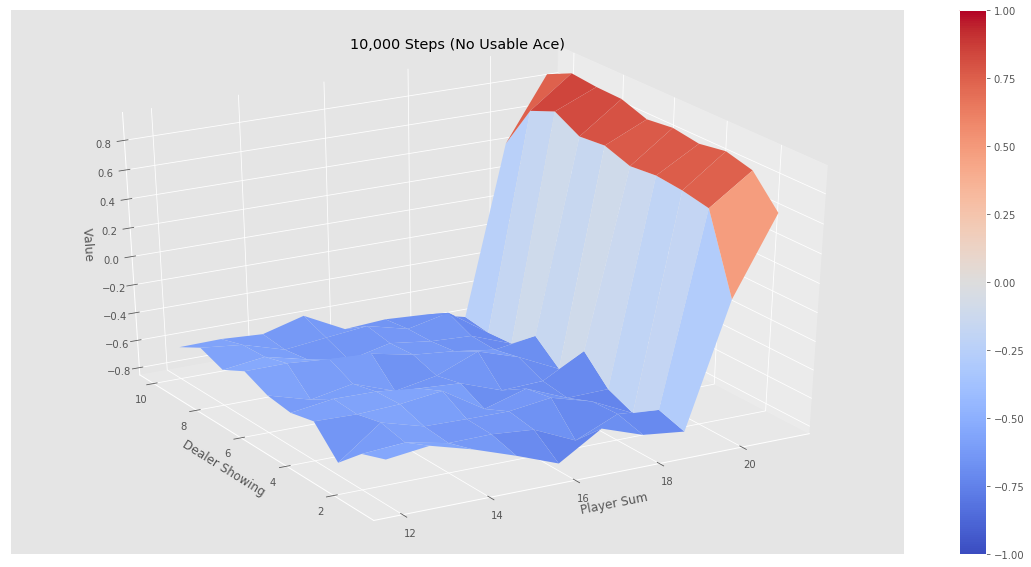

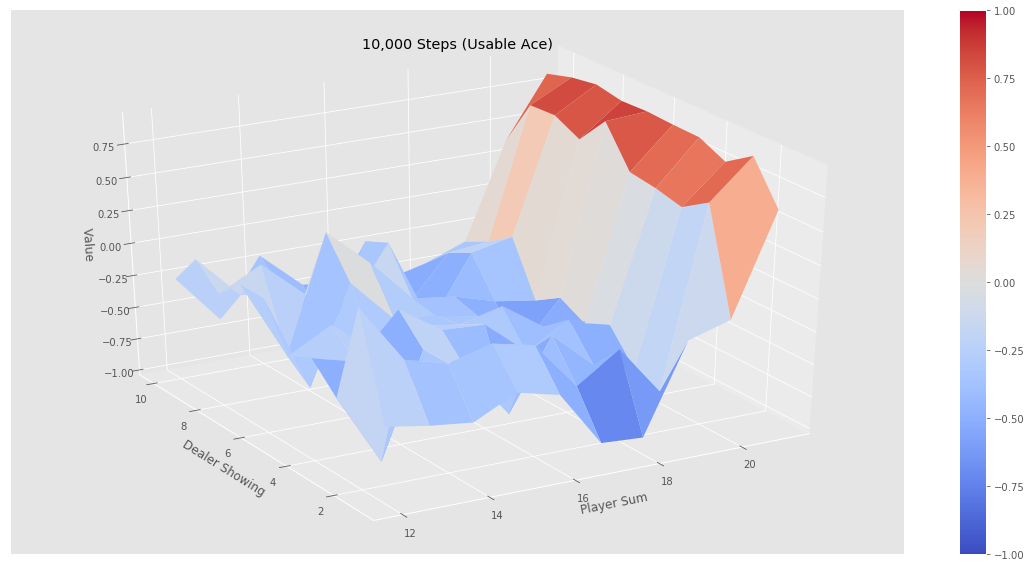

In [114]:
plotting.plot_value_function(final_V_10k, title="10,000 Steps")

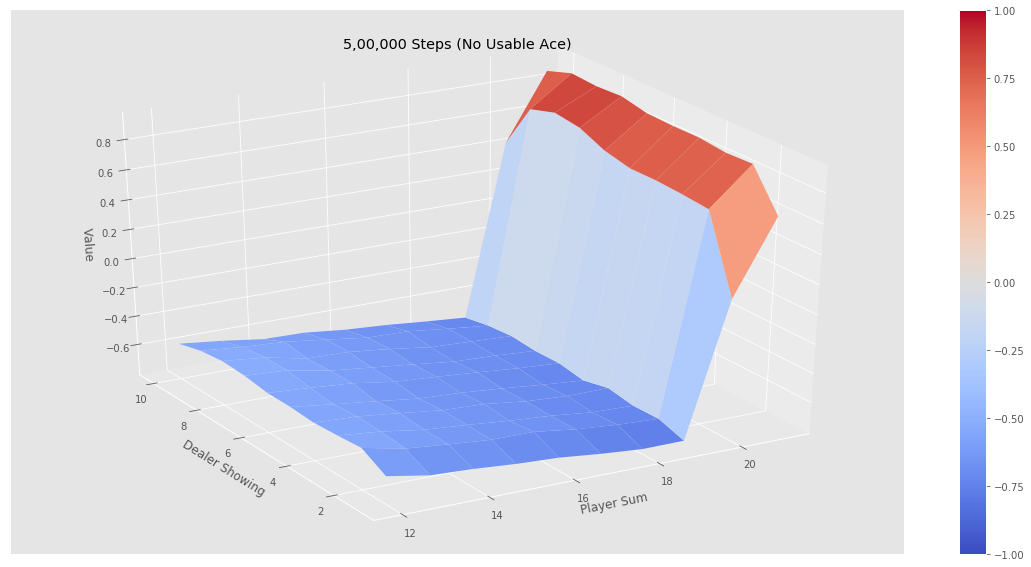

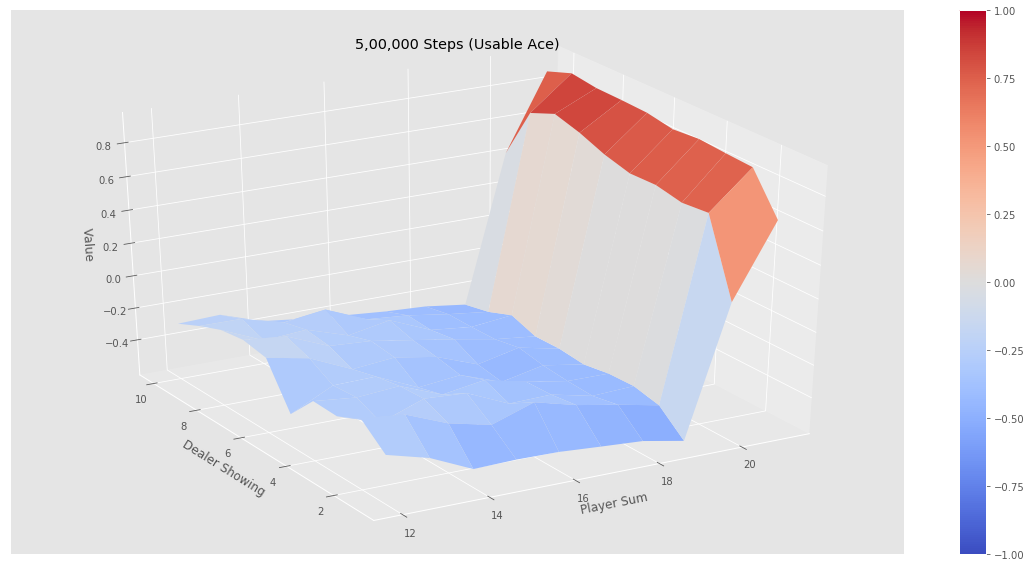

In [115]:
plotting.plot_value_function(final_V_50k, title="5,00,000 Steps")